# Section 2. Mobility analysis

## Figures:
1. jump-distance and arrival-time distribution
2. radius of gyration
3. within clusters: jump-distance distribution
4. within clusters: MSD plot 
5. within clusters: Exploration-tendency
6. cross clusters: jump-distance distribution
7. cross clusters: MSD plot 
8. cross clusters: Exploration-tendency

In [1]:
run import_library_data.ipynb

import done


In [2]:

import warnings
warnings.filterwarnings("ignore")

In [3]:
from scipy.optimize import curve_fit
import numpy as np

def linear_fun(x, a, b):
    return a * np.asarray(x) + b

def fitting_powerlaw(x, y ,x_line,base):
    #base=10
    popt, cov = curve_fit(linear_fun, np.log(x+0.000001)/np.log(base), np.log(y+0.000001)/np.log(base))
    a, b = popt
    y_line = linear_fun(np.log(x_line+0.000001)/np.log(base), a, b)
    y_line = np.power(base, y_line)

    return a,b, x_line, y_line

def fitting_linear(x, y ,base):
    #base=10
    popt, cov = curve_fit(linear_fun, x, y)
    a, b = popt
    y_line = linear_fun(x, a, b)

    return a, b, x, y_line

In [4]:
def set_fig_style(ax1, xlabel,ylabel,ratio):
    labelfont  = 14*ratio
    tickfont   = 14*ratio
    #tickfont   = 10*ratio
    legendfont = 14*ratio
    ax1.tick_params(axis='both', which='both', direction="in", labelsize=tickfont, pad=8 )
    for tick in ax1.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)
    for tick in ax1.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)

    ax1.set_xlabel(xlabel, fontsize=labelfont, labelpad=labelfont )
    ax1.set_ylabel(ylabel,fontsize=labelfont, labelpad=labelfont )
    #ax1.legend(loc='upper right', fontsize=legendfont, frameon=False)

    #ax1.spines.right.set_visible(False)
    #ax1.spines.top.set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
   

# Figures

In [5]:
def jump_distance_distribution(df_list,label_list,color_list,path_figures):
    base=10
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    for data, label,color in zip(df_list, label_list,color_list):
        data['travel_d(km)'] = data['travel_d(km)'].astype('float')

        data=data[(data['travel_d(km)']<=4000)&(data['travel_d(km)']>=1)]
        data.dropna(subset=['travel_d(km)'])

        count, bins_count = np.histogram(data['travel_d(km)']+1, bins=500)
        pdf = count /np.sum(count)
        bins_count = np.array([(bins_count[i] + bins_count[i + 1]) / 2 for i in np.arange(len(bins_count) - 1)])


        a, b, xline, yline = fitting_powerlaw(bins_count[0:50], pdf[0:50],bins_count,base)
        ax.scatter(bins_count, pdf, color=color,  s=5 ,label=label+' ('+r'$\alpha=$'+str(round(a,2))+')')
        ax.plot(xline, yline, color=color, linewidth=1)
            
    set_fig_style(ax, r'$\Delta r [km]$',r'$P(\Delta r)$',1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()
    plt.tight_layout()
    #ax.set_ylim(1/1000000, 1)
    #ax.set_ylim(1 ,np.max(data['count'])*1.1)
    fig.savefig(path_figures, dpi=600)

In [6]:
def arrival_time_distribution(df_list,label_list,color_list,path_figures):
    base=10
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    for data,label,color in zip(df_list,label_list,color_list):
        data['stay_t(h)'] = data['stay_t(h)'].astype('float')
        data['stay_t(min)']=data['stay_t(h)']*60
        count, bins_count = np.histogram(data['stay_t(min)'], bins=500)
        pdf = count / np.sum(count)
        bins_count = np.array([(bins_count[i] + bins_count[i + 1]) / 2 for i in np.arange(len(bins_count) - 1)])

        a, b, xline, yline = fitting_powerlaw(bins_count[0:50], pdf[0:50], bins_count,base)
        ax.scatter(bins_count, pdf, color=color, s=5, label=label+' ('+r'$\beta=$'+str(round(a,2))+')')
        ax.plot(xline, yline,color=color, linewidth=1)
    
    set_fig_style(ax, r'$\Delta t [min]$',r'$P(\Delta t)$',1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()
    #ax.set_xlim(5 , 2000)
    #ax.set_ylim(1/10000, 1)
    plt.tight_layout()
    fig.savefig(path_figures,dpi=600)

In [7]:
def radius_gyration_distribution(df_list,label_list,color_list,path_figures):
    base=10
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    for data, label,color in zip(df_list, label_list,color_list):
        count, bins_count = np.histogram(data['rg'], bins=500)
        pdf = count /np.sum(count)
        bins_count = np.array([(bins_count[i] + bins_count[i + 1]) / 2 for i in np.arange(len(bins_count) - 1)])

        a, b, xline, yline =fitting_powerlaw(bins_count[0:50], pdf[0:50],bins_count,base)
        ax.scatter(bins_count, pdf, color=color,  s=5 ,label=label+' ('+r'$slope=$'+str(round(a,2))+')')
        ax.plot(xline, yline, color=color, linewidth=1)
   
    set_fig_style(ax, r'$r_g [km]$',r'$P(r_g)$',1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()
    plt.tight_layout()
    #ax.set_ylim(1/1000000, 1)
    #ax.set_ylim(1 ,np.max(data['count'])*1.1)
    fig.savefig(path_figures, dpi=600)

In [45]:
def fun_temp(x,a,b):
        return a+b*np.log10(x+0.001)
    
def MSD_plot(df,df_home, Edc_dict,path_figures,strx):
    base=10
    df_data = copy.deepcopy(df)
    df_data=df_data[df_data['cluster']!=-1]
    df_data = df_data.sort_values(by=['id', 'start'])
    
    df_MSD=[]
    count=0
    for id_index, df_temp in df_data.groupby(['id','cluster']): ###within cluster,'cluster'
        df_temp['index'] = np.arange(len(df_temp))
        index_from_home = df_temp[df_temp['d_home']<0.1]['index'].min()
        #print(id_index,index_from_home,len(df_temp))
        ####starting from home
        if math.isnan(index_from_home)==False:
            df_temp=df_temp.iloc[index_from_home:-1,:]
            if len(df_temp)>2:
                start_t=df_temp['start'].values[0]
                ####start cross cluster
                df_temp['MSD'] = list(map(lambda i: np.mean(np.power(df_temp['d_home'][0:i], 2)), range(1,len(df_temp)+1)))
                df_temp['t'] = (df_temp['start'] - start_t) / 3600  ###mins
                df_MSD.append(df_temp[['t','MSD', 'id','cluster']])
                
                
                count+=1
                if count>10000:
                    break
                    
    df_MSD=pd.concat(df_MSD)
    df_MSD=df_MSD.groupby(['t','id','cluster'])['MSD'].mean().reset_index()

    df_MSD['t'] = list(map(lambda x: math.pow(base, int(math.log10(x+1)/0.1)*0.1), df_MSD['t']))
    df_MSD['MSD'] = np.power(df_MSD['MSD'],1/2)

    df_MSD.to_csv(path_figures+'df_MSD_intra_'+strx+'.csv')
    
    ####for more details
    fitting_slope=[]
    templist = list([int(math.pow(10, i/5)) for i in np.arange(0, 20)])
    #templist=[0,10,100,1000,10000]
    '''    
    for value1, value2 in zip(templist[0:len(templist)-1], templist[1:len(templist)]):
        id_list = [key for key, value in Edc_dict.items() if value >= value1-1 and value <= value2]
        df_tempx = df_MSD[df_MSD['id'].isin(id_list)]
        try:
            df_tempx=df_tempx.groupby(['t'])['MSD'].mean().reset_index()
            xline = np.log10(df_tempx['t'])
            yline = np.log10(df_tempx['MSD'])

            popt, pcov = curve_fit(fun_temp, xline[1:-1], yline[1:-1],maxfev = 100000)
            fitting_slope.append([value1,popt[1]])
            print(value1,value2,popt[1])
        except:
            x=False

    '''
    
    for id_str,df_temp in df_MSD.groupby(['id']):
        df_temp=df_temp.groupby(['t'])['MSD'].mean().reset_index()
        df_tempy =df_temp[(df_temp['t']>=1)&(df_temp['MSD']>=0.001)]
        if len(df_tempy)>10 and id_str in Edc_dict.keys() and df_tempy['t'].max()>10:
            df_tempy['t'] = np.log10(df_tempy['t'])
            df_tempy['MSD'] = np.log10(df_tempy['MSD']+0.001)

            popt, pcov = curve_fit(fun_temp, df_tempy['t'] ,  df_tempy['MSD'],maxfev = 100000)
            fitting_slope.append([Edc_dict[id_str],popt[1]])
            #print(Edc_dict[id_str],popt[1])
            if popt[1]>10:
                df_tempy['t'] =np.log10(df_tempy['t']+0.001)
                print(Edc_dict[id_str],popt[1])
                print(df_tempy[['t','MSD']])
           

         
    df_fitting_slope=pd.DataFrame(np.array(fitting_slope),columns=['rgc','slope'])
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.8))
    df_fitting_slope['rgc'] = list(map(lambda i: math.pow(10, int(math.log10(i+1)/0.1)*0.1),  df_fitting_slope['rgc'] ))
                
    df_temp_mean=df_fitting_slope.groupby(['rgc'] )['slope'].mean().reset_index()
    ax.scatter(df_temp_mean['rgc'],df_temp_mean['slope'])
    
    set_fig_style(ax, r'$R_{g_{c}}$',r'$v$' +' (inter-cluster)',1)
    ax.legend(loc='upper left', fontsize=12, frameon=False)
    ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.set_ylim(0.1, 2000)
    #ax.set_xlim(0.5, 2000)
    plt.tight_layout()
    fig.savefig(path_figures+'MSD_slope_rgc'+strx+'.png',dpi=600)
    

    color_list=['#000000','#fa8072','#9ab4d5','#8cd2c6','#edf7b5']
    color_list=['#000000','#e41a1c', '#377eb8','#0f947e']
    #color_list = ['#000000', '#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']
    marker_list = ['o', 's', '^', '<', '>', '*', '+']
    templist=[0,1,10,100,500]
    label_list=[r'$R_{g_c}=1$',r'$R_{g_c}=10$',r'$R_{g_c}=100$',r'$R_{g_c}=1000$']
    
   
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.8))

    for value1, value2,color,marker,label in zip(templist[0:len(templist)-1], templist[1:len(templist)],color_list,marker_list,label_list):
        id_list = [key for key, value in Edc_dict.items() if value >= value1-1 and value <= value2]
        df_tempx = df_MSD[df_MSD['id'].isin(id_list)]
        print(len(id_list))
        df_tempx=df_tempx.groupby(['t'])['MSD'].mean().reset_index()
        try:
            df_tempy=df_tempx[(df_tempx['t']>10)|(df_tempx['t']<2)] #len(templist)
            #df_tempy =df_tempx[df_tempx['t']>=1]
            #df_tempy=df_tempx
            xline = np.log10(df_tempy['t'])
            yline = np.log10(df_tempy['MSD'])
            popt, pcov = curve_fit(fun_temp, xline[1:-1], yline[1:-1],maxfev = 100000)
            xline=np.arange(10000)/5
            yline=fun_temp(np.log10(xline), *popt)
            yline = np.power(10,yline)

            ax.plot(xline, yline,color=color,linewidth=1)
            print(value1,round(popt[1],1))
            ax.scatter(df_tempx['t'], df_tempx['MSD'], color=color,marker=marker,s=20,label=label)
        except:
            x=False
    #ax.plot(np.arange(1, 400000) / 10, np.arange(1, 400000) / 10, color='black')
    
    ax.axvline(x=24, linewidth=1,color='grey',linestyle=":")
    ax.axvline(x=24*7, linewidth=1, color='grey',linestyle=":")
    ax.axvline(x=24 * 28, linewidth=1, color='grey',linestyle=":")

    
    set_fig_style(ax, r'$t(h)$',r'$MSD(t)^{1/2}$',1)
    ax.legend(loc='upper left', fontsize=12, frameon=False)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(0.01, 5000)
    #ax.set_ylim(0.01, 500)
    #ax.set_xlim(0.5, 2000)
    plt.tight_layout()
    fig.savefig(path_figures+'MSD_usr_groups'+strx+'.png',dpi=600)
    
    
    
    
    return df_fitting_slope


In [33]:
def fun_temp(x,a,b):
        return a+b*np.log10(x+0.001)
    
def MSD_cross_plot(df,df_home, Edc_dict,path_figures,strx):
    base=10
    df_data = copy.deepcopy(df)
    df_data = df_data.sort_values(by=['id', 'start'])
    
    df_tempx= df_data[['id', 'cluster']]
    check = np.array(df_tempx.shift(-1) != df_tempx)
    check = [False if check[i, 0] == False and check[i, 1] == False else True for i in np.arange(len(check))]
    df_data = df_data.loc[check]
        
    df_MSD=[]
    count=0
    for id_index, df_temp in df_data.groupby(['id']): ###cross cluster,'cluster'
        df_temp['index'] = np.arange(len(df_temp))
        index_from_home = df_temp[df_temp['d_home']<0.1]['index'].min()
        #print(id_index,index_from_home,len(df_temp))
        ####starting from home
        if math.isnan(index_from_home)==False:
            df_temp=df_temp.iloc[index_from_home:-1,:]
            if len(df_temp)>2:
                start_t=df_temp['start'].values[0]
                ####start cross cluster
                df_temp['MSD'] = list(map(lambda i: np.mean(np.power(df_temp['d_home'][0:i], 2)), range(1,len(df_temp)+1)))
                df_temp['t'] = (df_temp['start'] - start_t) / 3600  ###mins
                
                df_MSD.append(df_temp[['t','MSD', 'id']])
                
                count+=1
                if count>10000:
                    break
    df_MSD=pd.concat(df_MSD)

    df_MSD['t'] = list(map(lambda x: math.pow(base, int(math.log10(x+1)/0.1)*0.1), df_MSD['t']))
    df_MSD['MSD'] = np.power(df_MSD['MSD'],1/2)
    
    df_MSD.to_csv(path_figures+'df_MSD_inter_'+strx+'.csv')
    ####for more details
    fitting_slope=[]
    templist = list([int(math.pow(10, i/5)) for i in np.arange(0, 20)])
    
    print('strange')
    for id_str,df_temp in df_MSD.groupby(['id']):
        df_temp=df_temp.groupby(['t'])['MSD'].mean().reset_index()
        df_tempy =df_temp[(df_temp['t']>=1)&(df_temp['MSD']>=0.001)]
        if len(df_tempy)>5 and id_str in Edc_dict.keys() and df_tempy['t'].max()>10:
            df_tempy['t'] = np.log10(df_tempy['t'])
            df_tempy['MSD'] = np.log10(df_tempy['MSD'])

            popt, pcov = curve_fit(fun_temp, df_tempy['t'] ,  df_tempy['MSD'],maxfev = 100000)
            fitting_slope.append([Edc_dict[id_str],popt[1]])
            #print(Edc_dict[id_str],popt[1])
            if popt[1]>10:
                df_tempy['t'] =np.log10(df_tempy['t']+0.001)
                print(Edc_dict[id_str],popt[1])
                print(df_tempy[['t','MSD']])
            
    df_fitting_slope=pd.DataFrame(np.array(fitting_slope),columns=['rgc','slope'])
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.8))
    df_fitting_slope['rgc'] = list(map(lambda i: math.pow(10, int(math.log10(i+1)/0.1)*0.1),  df_fitting_slope['rgc'] ))
                
    df_temp_mean=df_fitting_slope.groupby(['rgc'] )['slope'].mean().reset_index()
    ax.scatter(df_temp_mean['rgc'],df_temp_mean['slope'])
            
    set_fig_style(ax, r'$r_{g_{c}}$',r'$v$' +' (inter-cluster)',1)
    ax.legend(loc='upper left', fontsize=12, frameon=False)
    ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.set_ylim(0.1, 2000)
    #ax.set_xlim(0.5, 2000)
    plt.tight_layout()
    fig.savefig(path_figures+'MSD_slope_rgc'+strx+'.png',dpi=600)
    
    
    color_list=['#000000','#fa8072','#9ab4d5','#8cd2c6','#edf7b5']
    color_list=['#000000','#e41a1c', '#377eb8','#0f947e']
    #color_list = ['#000000', '#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']
    marker_list = ['o', 's', '^', '<', '>', '*', '+']
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.8))
    
    templist=[0,10,100,1000,10000]
    label_list=[r'$[0,10)$',r'$[10,100)$',r'$[100,1000)$',r'$[1000,10000)$']
   

    for value1, value2,color,marker,label in zip(templist[0:len(templist)-1], templist[1:len(templist)],color_list,marker_list,label_list):
        id_list = [key for key, value in Edc_dict.items() if value >= value1-1 and value <= value2]
        df_tempx = df_MSD[df_MSD['id'].isin(id_list)]
        print(len(id_list))
        try:
            df_tempx=df_tempx.groupby(['t'])['MSD'].mean().reset_index()
            
            df_tempy =df_tempx[df_tempx['t']>=0.5]
            df_tempy=df_tempx[(df_tempx['t']>10)|(df_tempx['t']<2)] #len(templist)
            
            df_tempy=df_tempx[(df_tempx['t']>1)]
            xline = np.log10(df_tempy['t'])
            yline = np.log10(df_tempy['MSD'])

            popt, pcov = curve_fit(fun_temp, xline, yline,maxfev = 100000) #[1:-1]
            xline=np.arange(10000)/5
            yline=fun_temp(np.log10(xline), *popt)
            yline = np.power(10,yline)

            ax.plot(xline, yline,color=color,linewidth=1)
            print(value1,value2,round(popt[1],1))
            ax.scatter(df_tempx['t'], df_tempx['MSD'], color=color,marker=marker,s=20,label=label)
        except:
            x=False
    #ax.plot(np.arange(1, 400000) / 10, np.arange(1, 400000) / 10, color='black')
    
   # ax.axvline(x=24, linewidth=1,color='grey',linestyle=":")
    #ax.axvline(x=24*7, linewidth=1, color='grey',linestyle=":")
    #ax.axvline(x=24 * 28, linewidth=1, color='grey',linestyle=":")

    
    set_fig_style(ax, r'$t(h)$',r'$MSD(t)^{1/2}$',1)
    #ax.legend(loc='upper left', fontsize=12, frameon=False)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(0.1, 2000)
    ax.set_xlim(0.5, 2000)
    plt.tight_layout()
    fig.savefig(path_figures+'MSD_usr_groups'+strx+'.png',dpi=600)
    return df_fitting_slope

In [10]:
def S_VS_t(df,Edc_dict,path_fgiure,strx):
    base=10
    df_data = copy.deepcopy(df)
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    color_list=['#000000','#e41a1c', '#377eb8','#0f947e']
    marker_list = ['o', 's', '^', '<', '>', '*', '+']
    label_list=[r'$R_{g_c} \in [0,10)$',r'$R_{g_c} \in [10,100)$',r'$R_{g_c} \in [100,1000)$',r'$R_{g_c} \in [1000,10000)$']
    

    templist = list([int(math.pow(10, i / 2)) for i in np.arange(1, 9)])
    templist = list([int(math.pow(10, i)) for i in np.arange(0, 6)])
    df_data_temp=copy.deepcopy(df_data)
    df_data_temp=df_data_temp.sort_values(by=['id','t'],ascending=True)
        
    for value1, value2, color, marker,label in zip(templist[0:-2], templist[1:-1], color_list, marker_list,label_list):
        id_list = [key for key, value in Edc_dict.items() if value >= value1-1 and value <= value2]
        df_temp = df_data_temp[df_data_temp['id'].isin(id_list)]
        df_temp['t']=df_temp['t']*60
        df_temp['t'] = list(map(lambda x: int(math.pow(base, round(math.log(x+0.1) / math.log(base), 1))), df_temp['t']))
        df_temp['t']=df_temp['t']/60
        df_temp=df_temp.groupby(['t'])['S'].mean().reset_index()
        try:
            ax.scatter(df_temp['t'], df_temp['S'], color=color, marker=marker,label=label, s=20)
            a_temp, b_temp, xline, yline = fitting_powerlaw(df_temp['t'] + 0.001, df_temp['S'] + 0.001,
                                                                  df_temp['t'], base=10)
        except:
            x=False

        #print(pd.unique(df_temp['t']))
        #ax.plot(xline,yline,color=color)


    set_fig_style(ax, r'$t(h)$',r'$S(t)$',1)
    ax.legend(loc='lower right', fontsize=12, frameon=False)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1,2000)
    ax.set_ylim(1,20)
    plt.tight_layout()
    fig.savefig(path_figures + 'S_vs_t'+strx+'.png', dpi=600)
    
def frquency_rank(df,Edc_dict,path_figures,strx):
    base=10
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    color_list=['#000000','#e41a1c', '#377eb8','#0f947e']
    marker_list = ['o', 's', '^', '<', '>', '*', '+']

    templist = list([int(math.pow(10, i / 2)) for i in np.arange(1, 9)])
    templist = list([int(math.pow(10, i)) for i in np.arange(0, 6)])
    df_data_temp=copy.deepcopy(df)
    for value1, value2, color, marker in zip(templist[0:-2], templist[1:-1], color_list, marker_list):
        id_list = [key for key, value in Edc_dict.items() if value >= value1-1 and value <= value2]
        df_temp = df_data_temp[df_data_temp['id'].isin(id_list)]
        df_temp['count']=[1]*len(df_temp)
        df_temp=df_temp.groupby(['id','label'])['count'].sum().reset_index()
        df_temp=df_temp.sort_values(by=['id','count'],ascending=False)
        
        df_temp['rank'] = [1] * len(df_temp)
        rank_cum= df_temp.groupby(['id'])['rank'].cumsum()
        df_temp['rank']=rank_cum
        
        df_tempx = df_temp.groupby('rank')['count'].mean().reset_index()
        try:
            ax.scatter(df_tempx['rank'], df_tempx['count'], color=color, marker=marker,label=r'$r_{g_c}=$' + str(value1), s=20)
            a_temp, b_temp, xline, yline =fitting_powerlaw(df_temp['rank'] + 0.001, df_temp['count'] + 0.001,
                                                              df_temp['rank'], base=10)
        except:
            x=False
        #ax.plot(xline,yline,color=color)
        print('usr_group', 'value1, value2', a_temp)

    set_fig_style(ax, r'$k$'+' (rank of locations)',r'$f_{k}$',1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1,100)
    plt.tight_layout()
    fig.savefig(path_figures + 'frequency_rank'+strx+'.png', dpi=600)
    

def Exploartion_tendency_plot(df,Edc_dict,path_figures,strx):
    base=10
    df_data = copy.deepcopy(df)
    df_data = df_data.sort_values(by=['id', 'start'])

    df_data['n'] = 1
    df_data['n'] = df_data.groupby(['id', 'cluster'])['n'].cumsum()
    df_data['t']= df_data.groupby(['id', 'cluster'])['stay_t(h)'].cumsum()
    df_data = df_data.drop_duplicates(subset=['id', 'label', 'cluster'])
    df_data['S'] = 1
    df_data['S'] = df_data.groupby(['id', 'cluster'])['S'].cumsum()
    
    
    S_VS_t(df_data,Edc_dict,path_figures,strx)
    frquency_rank(df,Edc_dict,path_figures,strx)
    
    ####get delta_S
    df_data_shift=df_data.shift(+1)
    check=[ True if i==j and k==d else False for i,j,k,d in zip(df_data['id'],df_data_shift['id'],df_data['cluster'],df_data_shift['cluster'])]
    df_data['detla_S']=list([i-j if k==True and math.isnan(j)==False else i for i,j, k in zip(df_data['S'],df_data_shift['S'],check)])
    df_data['detla_n'] = list([i-j  if k==True and math.isnan(j)==False else i for i, j,k in zip(df_data['n'], df_data_shift['n'],check)])
    df_data['prob']=df_data['detla_S']/ (df_data['detla_n']+0.1)
    #df_data['prob']=df_data['prob']/df_data['prob'].mean()


    fig2, ax2 = plt.subplots(1, 1, figsize=(4.5, 3.8))
   
        
    df_data_temp = copy.deepcopy(df_data)


    df_data_temp = df_data_temp[['id', 'cluster', 'start', 'S', 'prob']].dropna()
    df_data_temp = df_data_temp.sort_values(by=['S'])
    #df_data_temp['S'] = list(map(lambda x: int(math.pow(base, round(math.log(x) / math.log(base), 1))), df_data_temp['S']))
    
    df_data_temp=df_data_temp[df_data_temp['S']<=20]
    df_temp = df_data_temp.groupby(['S'])['prob'].mean().reset_index()

    df_std= df_data_temp.groupby(['S'])['prob'].std().reset_index()

    learned_gamma, b, xline, yline =fitting_powerlaw(df_temp['S'], df_temp['prob'],np.arange(4000), base)
    print('exponent',learned_gamma,b)
    a, b, xline, yline = fitting_linear(np.log10(df_temp['S']), df_temp['prob'], base)
    ax2.plot(df_temp['S'],yline,'k--',zorder=0,label=r'$P_w \sim S_w^{-\gamma_w}$')

    color_list=['#000000','#e41a1c', '#377eb8','#0f947e']
    marker_list = ['o', 's', '^', '<', '>', '*', '+']


    templist = list([int(math.pow(10, i)) for i in np.arange(0, 6)])
    templist=[0,10,100,1000,10000]
    label_list=[r'$[0,10)$',r'$[10,100)$',r'$[100,1000)$',r'$[1000,10000)$']

    print(len(df_data_temp))
    df_data_temp['id']=df_data_temp['id'].astype(int)
    for value1, value2, color, marker,label in zip(templist[0:-1], templist[1:len(templist)], color_list, marker_list,label_list):
        id_list = [key for key, value in Edc_dict.items() if value >= value1-1 and value <= value2]
        df_temp = df_data_temp[df_data_temp['id'].isin(id_list)]
        df_temp = df_temp.groupby(['S'])['prob'].mean().reset_index()
        try:
            ax2.scatter(df_temp['S'], df_temp['prob'],  color=color,marker=marker) #,label=label
            a_temp, b_temp, xline, yline = fitting_powerlaw(df_temp['S'] + 0.001, df_temp['prob'] + 0.001,df_temp['S'], base=10)
            print('check_slope',value1,a_temp)
        except:
            x=False
        
    set_fig_style(ax2, 'Visited locations, '+r'$S_w$','Exploration tendency, 'r'$P_w$',1)
    ax2.legend(loc='lower left', fontsize=12, frameon=False)
    ax2.set_ylim(0.1, 1.2)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    plt.tight_layout()
    fig2.savefig(path_figures + 'delta_S_VS_S'+strx+'.png', dpi=600)
    
    
    #######gamma for each person
    slope=[]
    for value1, value2 in zip(templist[0:-2], templist[1:-1]):
        id_list = [key for key, value in Edc_dict.items() if value >= value1 and value <= value2]
        df_temp = df_data_temp[df_data_temp['id'].isin(id_list)]
        for idx, df_tempx in df_temp.groupby(['id']):
            try:
                a_temp, b_temp, xline, yline = fitting_powerlaw(df_tempx['S'] + 0.001, df_tempx['prob'] + 0.001,df_tempx['S'], base=10)
                if -a_temp>0 and len(df_tempx)>10 and df_tempx['S'].max()>5:
                    slope.append([-a_temp,Edc_dict[idx]])
            except:
                x=0
          
    slope=np.array(slope)
    
    df_slope=pd.DataFrame(slope,columns=['slope','rgc'])
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))

    ax.hist([-i for i in slope[:,0] if i>=0 and i<=1.1], bins=10,density=True,color=color_list[2],rwidth=0.6)
    
    count, bins_count = np.histogram(slope[:,0], bins=10)
    bins_count = np.array([(bins_count[i] + bins_count[i + 1]) / 2 for i in np.arange(len(bins_count) - 1)])
    pdf = count / np.sum(count)
    
    a, b, xline, yline = fitting_powerlaw(bins_count, pdf,bins_count, base)
    print('gamma_distribution_slope',a,b)
    set_fig_style(ax, r'$-\gamma_w$',r'$P(-\gamma_w)$',1)
    ax.set_xticks([0,0.25,0.50,0.75,1])
    plt.gca().invert_xaxis()
    ax.set_xticklabels(['-1','-0.75','-0.5','-0.25','0'])
    plt.tight_layout()
    fig.savefig(path_figures + 'gamma_'+strx+'.png', dpi=600)
    
    
    #####for rho
    output_mat=[]
    fig1, (ax1,ax2,ax3,ax4)= plt.subplots(1, 4, figsize=(15, 4))
    for value1, value2, ax in zip(templist[0:-2], templist[1:-1], [ax1,ax2,ax3,ax4]):
        id_list = [key for key, value in Edc_dict.items() if value >= value1-1 and value <= value2]
        df_temp = df_data_temp[df_data_temp['id'].isin(id_list)]
        df_temp['S^gamma']=np.power(df_temp['S'],learned_gamma)
        
        rho_list=[]
        for id_index,df_tempx in df_temp.groupby('id'):
            df_tempx=df_tempx[(df_tempx['prob']>0)]
            if len(df_tempx)>=20:
                a,b,xline,yline=fitting_linear(df_tempx['S^gamma'][0:-2], df_tempx['prob'][1:-1], base)
                if a >0 and a < 1: 
                    rho_list.append(a)
                    output_mat.append([a,Edc_dict[id_index],value1])

        ax.hist(rho_list, bins=9,density=True,color=color_list[2],rwidth=0.6)
        
        set_fig_style(ax, r'$\rho_w$',r'$P(\rho_w)$',1)

    plt.tight_layout()
    fig1.savefig(path_figures + 'rho'+strx+'_detail.png', dpi=600)
    
    fig1, ax= plt.subplots(1, 1, figsize=(4, 4))
    ax.hist(np.array(output_mat)[:,0], bins=9,density=True,color=color_list[2],rwidth=0.6)
        
    #ax.hist(rho_list, bins=9,density=True,color=color_list[2],rwidth=0.6)
    set_fig_style(ax, r'$\rho_w$',r'$P(\rho_w)$',1)

    plt.tight_layout()
    fig1.savefig(path_figures + 'rho'+strx+'.png', dpi=600)
    
    return df_slope
    
def frquency_rank_cross_plot(df,Edc_dict,path_figures,strx):
    base=10
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    color_list=['#000000','#e41a1c', '#377eb8','#0f947e']
    marker_list = ['o', 's', '^', '<', '>', '*', '+']

    templist = list([int(math.pow(10, i / 2)) for i in np.arange(1, 9)])
    templist = list([int(math.pow(10, i)) for i in np.arange(0, 6)])
    df_data_temp=copy.deepcopy(df)
    for value1, value2, color, marker in zip(templist[0:-2], templist[1:-1], color_list, marker_list):
        id_list = [key for key, value in Edc_dict.items() if value >= value1 and value <= value2]
        df_temp = df_data_temp[df_data_temp['id'].isin(id_list)]
        df_temp['count']=[1]*len(df_temp)
        df_temp=df_temp.groupby(['id','cluster'])['count'].sum().reset_index()
        df_temp=df_temp.sort_values(by=['id','count'],ascending=False)
        
        df_temp['rank'] = [1] * len(df_temp)
        rank_cum= df_temp.groupby(['id'])['rank'].cumsum()
        df_temp['rank']=rank_cum
        
        df_tempx = df_temp.groupby('rank')['count'].mean().reset_index()
        try:
            ax.scatter(df_tempx['rank'], df_tempx['count'], color=color, marker=marker,label=r'$r_{g_c}=$' + str(value1), s=20)
            a_temp, b_temp, xline, yline =fitting_powerlaw(df_temp['rank'] + 0.001, df_temp['count'] + 0.001,df_temp['rank'], base=10)
        except:
            x=False  
        #ax.plot(xline,yline,color=color)
            print('usr_group', 'value1, value2', a_temp)

    set_fig_style(ax, r'$k$'+' (rank of module)',r'$f_{k}$',1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1,100)
    plt.tight_layout()
    fig.savefig(path_figures + 'frequency_rank'+strx+'.png', dpi=600)

def Exploartion_tendency_cross_plot(df,Edc_dict,path_figures,strx):
    base=10
    
    df_data = copy.deepcopy(df)
    df_data = df_data.sort_values(by=['id','start'])


    ###this step is to find the consecutive duplicates
    df_datax = df_data[['id', 'cluster']]
    check = np.array(df_datax.shift(-1) != df_datax)
    check = [False if check[i, 0] == False and check[i, 1] == False else True for i in np.arange(len(check))]
    df_data = df_data.loc[check]

    #print(df_data[['id', 'start','cluster']].head(100))

    df_data['n'] = 1
    df_data['n'] = df_data.groupby('id')['n'].cumsum()
    df_data['t'] = df_data.groupby('id')['stay_t(h)'].cumsum()
    df_data = df_data.drop_duplicates(subset=['id', 'cluster'])
    df_data['S'] = 1
    df_data['S'] = df_data.groupby('id')['S'].cumsum()

    
    S_VS_t(df_data,Edc_dict,path_figures,strx)
    frquency_rank_cross_plot(df,Edc_dict,path_figures,strx)

    ####get delta_S
    df_data_shift=df_data.shift(+1)
    check = [True if i == j else False for i, j in zip(df_data['id'], df_data_shift['id'])]
    df_data['detla_S'] = list([i - j if k == True and math.isnan(j) == False else i for i, j, k in zip(df_data['S'], df_data_shift['S'], check)])
    df_data['detla_n'] = list([i - j if k == True and math.isnan(j) == False else i for i, j, k in zip(df_data['n'], df_data_shift['n'], check)])
    df_data['prob']=df_data['detla_S']/ (df_data['detla_n']+0.1)
    
    
    df_data_temp = copy.deepcopy(df_data)
    df_data_temp = df_data_temp[['id', 'cluster', 'start', 'S', 'prob']].dropna()
    df_data_temp = df_data_temp.sort_values(by=['S'])
    
    n=10
    check=df_data_temp.groupby(['id'])['S'].max().reset_index()
    check=check[check['S']>=n]
    df_data_temp=df_data_temp[df_data_temp['id'].isin(check['id'])]
    
    fig2, ax2 = plt.subplots(1, 1, figsize=(4.5, 3.8))
    
    #df_data_temp['S'] = list(map(lambda x: int(math.pow(base, round(math.log(x) / math.log(base), 1))), df_data_temp['S']))
    df_data_temp=df_data_temp[df_data_temp['S']<=n+1]

    color_list=['#000000','#e41a1c', '#377eb8','#0f947e']
    marker_list = ['o', 's', '^', '<', '>', '*', '+']

    templist=[0,10,100,1000,10000]
    label_list=[r'$[0,10)$',r'$[10,100)$',r'[100,1000)$',r'[1000,10000)$']
   
    print(len(df_data_temp))
    df_user_Prob_mean=[]
    df_data_temp['id']=df_data_temp['id'].astype(int)
    learned_gamma_list=[]
    for value1, value2, color, marker,label in zip(templist[0:-1], templist[1:len(templist)], color_list, marker_list,label_list):
        if value1==0:
            value1=5
        id_list = [key for key, value in Edc_dict.items() if value >= value1-1 and value <= value2*1.2]
        df_temp = df_data_temp[df_data_temp['id'].isin(id_list)]
        df_temp = df_temp.groupby(['S'])['prob'].mean().reset_index()
        try:
            a_temp, b_temp, xline, yline = fitting_powerlaw(df_temp['S'] + 0.001, df_temp['prob'] + 0.001,df_temp['S'], base=10)
            if value2==10:
                ax2.plot(df_temp['S'],yline,'k--',zorder=0,label=r'$P_c \sim S_c^{-\gamma_c}$')

            ax2.scatter(df_temp['S'], df_temp['prob'],  color=color,marker=marker)#,label=label
        except:
            x=False
        print(value1,value2,a_temp, b_temp)
        learned_gamma_list.append(a_temp)
    
    set_fig_style(ax2, 'Visited modules, '+r'$S_c$','Exploration tendency, '+r'$P_c$',1)
    ax2.legend(loc='lower left', fontsize=12, frameon=False)
    ax2.set_ylim(0.1, 1.2)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    plt.tight_layout()
    fig2.savefig(path_figures + 'delta_S_VS_S'+strx+'.png', dpi=600)
    

    #######gamma for each person
    slope=[]
    for value1, value2 in zip(templist[0:-2], templist[1:-1]):
        id_list = [key for key, value in Edc_dict.items() if value >= value1-1 and value <= value2]
        df_temp = df_data_temp[df_data_temp['id'].isin(id_list)]
        for idx, df_tempx in df_temp.groupby(['id']):
            try:
                a_temp, b_temp, xline, yline = fitting_powerlaw(df_tempx['S'] + 0.001, df_tempx['prob'] + 0.001,df_tempx['S'], base=10)
                if -a_temp>0: #and len(df_tempx)>10 and df_tempx['S'].max()>5:
                    slope.append([-a_temp,Edc_dict[idx]])
            except:
                x=0
          
    slope=np.array(slope)
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.hist([-i for i in slope[:,0] if i>=0 and i<=1.1], bins=10,density=True,color=color_list[2],rwidth=0.6)
    
    count, bins_count = np.histogram(slope[:,0], bins=10)
    bins_count = np.array([(bins_count[i] + bins_count[i + 1]) / 2 for i in np.arange(len(bins_count) - 1)])
    pdf = count / np.sum(count)
            
    a, b, xline, yline = fitting_powerlaw(bins_count, pdf,bins_count, base)
    print('gamma_distribution_slope',a,b)
    set_fig_style(ax, r'$-\gamma_c$',r'$P(-\gamma_c)$',1)
    ax.set_xlim(0,1)
    plt.tight_layout()
    
    fig.savefig(path_figures + 'gamma_'+strx+'_detail.png', dpi=600)
    
    df_slope=pd.DataFrame(slope,columns=['slope','rgc'])
    df_slopex=copy.deepcopy(df_slope)
    df_slopex['rgc'] = list(map(lambda x: int(math.pow(base, round(math.log(x+0.001) / math.log(base), 1))), df_slopex['rgc']))
    
    df_slopex=df_slopex.groupby('rgc')['slope'].mean().reset_index()
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.scatter(df_slopex['rgc'], df_slopex['slope'])
    a, b, xline, yline = fitting_linear(np.log10(df_slopex['rgc']+0.1), df_slopex['slope'], base)
    ax.plot(df_slopex['rgc']+0.1, yline, color='black', linewidth=2, zorder=0)
    ax.set_xscale('log')
    
    set_fig_style(ax, r'$r_{g_c}$',r'$\gamma_c$',1)
    plt.tight_layout()
    fig.savefig(path_figures + 'gamma_rgc'+strx+'.png', dpi=600)
    
    a_fix=a
    b_fix=b
    print('gamma_rgc',a,b)
    
    #####for rho
    output_mat=[]
    fig1, (ax1,ax2,ax3,ax4)= plt.subplots(1, 4, figsize=(15, 4))
    for value1, value2, ax,cnt in zip(templist[0:-2], templist[1:-1], [ax1,ax2,ax3,ax4],np.arange(len(templist))):
        id_list = [key for key, value in Edc_dict.items() if value >= value1-1 and value <= value2]
        df_temp = df_data_temp[df_data_temp['id'].isin(id_list)]
        
        
        learned_gamma=-(np.log10((value1-1+value2)/2)*a_fix+b_fix)
        learned_gamma=learned_gamma_list[cnt]
        
        print('check_learned_gamma',learned_gamma)
        df_temp['S^gamma']=np.power(df_temp['S'],learned_gamma)
        #df_temp['learned_gamma']=[np.log10(Edc_dict[i])*a_fix+b_fix for i in df_temp['id']]
        #df_temp['S^gamma']=np.power(df_temp['S'],-df_temp['learned_gamma'])
        
        rho_list=[]
        for id_index,df_tempx in df_temp.groupby('id'):
            if len(df_tempx)>=6:
                a,b,xline,yline=fitting_linear(df_tempx['S^gamma'][0:-2], df_tempx['prob'][1:-1], base)
                if a >0.01 and a < 0.99: 
                    rho_list.append(a)
                    output_mat.append([a,Edc_dict[id_index],value1])

        ax.hist(rho_list, bins=9,density=True,color=color_list[2],rwidth=0.6)
        
        set_fig_style(ax, r'$\rho_c$',r'$P(\rho_c)$',1)
        ax.set_xlim(0,1)
    plt.tight_layout()
    fig1.savefig(path_figures + 'rho'+strx+'_detail.png', dpi=600)
    
    fig1, ax= plt.subplots(1, 1, figsize=(4, 4))
    ax.hist(np.array(output_mat)[:,0], bins=9,density=True,color=color_list[2],rwidth=0.6)
        
    #ax.hist(rho_list, bins=9,density=True,color=color_list[2],rwidth=0.6)
    set_fig_style(ax, r'$\rho_c$',r'$P(\rho_c)$',1)

    plt.tight_layout()
    fig1.savefig(path_figures + 'rho'+strx+'.png', dpi=600)
    
    
    return df_slope
   

In [11]:
def distance_to_center_distribution(df_all,df_home,path_figures):
    templist = [math.pow(10, i / 5) for i in np.arange(0, 20)]

    color_list=['#fa8072','#9ab4d5','#edf7b5','#8cd2c6']
    color_list=['#377eb8', '#377eb8','#377eb8','#377eb8']
    templist = [math.pow(10, i) for i in np.arange(0, 6)]
    templist[0] = 0
    templist1=[0.1,1,100,500]
    templist2=[1,10,300,800]
    output_mat = []
    
    for dis_1, dis_2, color in zip(templist1, templist2,color_list):
        print(dis_1,dis_2)
        data = df_all[(df_all['d_home'] >= dis_1) & (df_all['d_home'] <dis_2)] # 
        #data=data[data['dis_to_cluster']>1]
        data=data.dropna()
        data['dis_to_cluster'] = data['dis_to_cluster'].astype('float')
        data['dis_to_cluster']= data['dis_to_cluster'] *1000+1
        mean_v = data['dis_to_cluster'].mean()
        median_v = data['dis_to_cluster'].median()
        
        fig, ax = plt.subplots(1, 1, figsize=(4.0, 2.7))
        
        #data['dis_to_cluster'] =np.log10(data['dis_to_cluster'])
        '''
        sns.distplot(data['dis_to_cluster'], hist=False, kde=True,
                     bins=8, color=color, norm_hist=False,
                     hist_kws={'edgecolor':color},ax=ax)
        '''
        sns.kdeplot(data['dis_to_cluster'] , shade=True, color=color,bw_adjust=6,log_scale=True,ax=ax)
        
        #ax.plot(xline,yline,linewidth=0.5)
        ax.axvline(mean_v,color='k')
        #ax.axvline(math.log10(median_v), color='k',linestyle=":")
        print('mean_v',mean_v/1000)
        print('median_v',median_v/1000)
        
        set_fig_style(ax, 'Distance to module centroid (km)', 'Fraction of locations',1.0)
      
        ax.set_xticks([0.1, 10, 1000, 100000, 10000000])
        ax.set_xticklabels([r'$10^{-4}$',r'$10^{-2}$',r'$10^0$',  r'$10^2$', r'$10^4$'],fontsize=14)
        ax.set_xlim(0.1,10000000)
        plt.tight_layout()
        fig.savefig(path_figures + 'distance_to_center_'+str(dis_1)+'.png', dpi=600)

In [12]:
def gmma_within_cross_plot(df1_data,df2_data,eq_str):
    base=10
    color_list=['#000000','#e41a1c', '#377eb8','#0f947e']
    df1_data['rgc'] = list(map(lambda x: int(math.pow(base, int(math.log(x+0.001) / math.log(base)/0.2)*0.2)), df1_data['rgc']))
    df1=df1_data.groupby('rgc')['slope'].mean().reset_index()
    df1_std=df1_data.groupby('rgc')['slope'].std().reset_index()
    
    df2_data['rgc'] = list(map(lambda x: int(math.pow(base, int(math.log(x+0.001) / math.log(base)/0.2)*0.2)), df2_data['rgc']))
    df2=df2_data.groupby('rgc')['slope'].mean().reset_index()
    df2_std=df2_data.groupby('rgc')['slope'].std().reset_index()
    
    print(df1.head(10))

    
    fig, ax = plt.subplots(1, 1, figsize=(4.2, 4.2))
    
    ax.errorbar(df1['rgc'][1:-1], df1['slope'][1:-1], yerr = df1_std['slope'][1:-1], fmt ='o',color='#e41a1c',ecolor='#e08081',linewidth=0.5)
    ax.errorbar(df2['rgc'][1:-1], df2['slope'][1:-1], yerr = df2_std['slope'][1:-1], fmt ='o',color='#377eb8',ecolor='#91c3eb',linewidth=0.5)
    
 
    a, b, xline, yline = fitting_linear(np.log10(df1['rgc'][1:-1]+0.001), df1['slope'][1:-1], base)
    print('within gramma slope',a,b)
    yline=np.log10(df1['rgc'])*a+b
    y_v=2.5/2*a+b
    print('middle,y_v',y_v,np.mean(yline))
    ax.plot(df1['rgc'], yline, color='#e41a1c', linewidth=2, zorder=1,label=r'$\gamma_w \approx$'+str(round(y_v,2)))
    
    a, b, xline, yline = fitting_linear(np.log10(df2['rgc'][1:-1]+0.001), df2['slope'][1:-1], base)
    print('cross gramma slope',a,b)
    yline=np.log10(df2['rgc'])*a+b
    ax.plot(df2['rgc'], yline, color='#377eb8', linewidth=2, zorder=1,label=eq_str)

    
    
    set_fig_style(ax, r'$R_{g_c}$',r'$\gamma$',1)
    ax.legend(loc='upper right', fontsize=10, frameon=False)
    
    
    '''
    ax.set_xlim(0.5,5000)
    ax.set_xlim(0.5,1100)
    
    ax.set_xticks([1,10,100,1000])
    ax.set_xticklabels([1,10,100,1000])
    '''
    ax.set_xscale('log')
    
    import matplotlib.ticker
   
    ax.set_ylim(0,1.0)
    #ax.set_ylim(0.5,1)
    fig.tight_layout()

    fig.savefig(path_figures + 'gamma_rg(compare).png', dpi=600)

In [13]:
def MSD_v_within_cross_plot(df1,df2):
    base=10
    color_list=['#000000','#e41a1c', '#377eb8','#0f947e']

    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.8))
   
    
    df1['rgc_new'] = list(map(lambda x: int(math.pow(base, round(math.log10(x), 1))), df1['rgc']))
    df2['rgc_new'] = list(map(lambda x: int(math.pow(base, round(math.log10(x), 1))), df2['rgc']))
         
    df_temp_mean1=df1.groupby(['rgc_new'] )['slope'].median().reset_index()
    df_temp_mean2=df2.groupby(['rgc_new'] )['slope'].median().reset_index()
    df_temp_std1=df1.groupby(['rgc_new'] )['slope'].std().reset_index()
    df_temp_std2=df2.groupby(['rgc_new'] )['slope'].std().reset_index()
    
    ax.errorbar(df_temp_mean1['rgc_new'][0:-1], df_temp_mean1['slope'][0:-1], df_temp_std1['slope'][0:-1],color='#377eb8', alpha=0.5, fmt='o',label='Within module')
    ax.errorbar(df_temp_mean2['rgc_new'][0:-1], df_temp_mean2['slope'][0:-1], df_temp_std2['slope'][0:-1],color='#e41a1c',  alpha=0.5,fmt='o',label='Cross module')
    
    ax.plot(df_temp_mean1['rgc_new'][0:-1], df_temp_mean1['slope'][0:-1], marker='o',color='#377eb8',linewidth=0.5)
    ax.plot(df_temp_mean2['rgc_new'][0:-1], df_temp_mean2['slope'][0:-1],  marker='o',color='#e41a1c',linewidth=0.5)
 
    a, b, xline, yline = fitting_linear(np.log10(df1['rgc'][1:-1]+0.001), df1['slope'][1:-1], base)
    print('within gramma slope',a,b)
    yline=np.log10(df1['rgc'])*a+b
    y_v=np.mean(yline)
    #ax.plot(df1['rgc'][0:-2], yline[0:-2], color='#e41a1c', linewidth=2, zorder=1)
    
    a, b, xline, yline = fitting_linear(np.log10(df2['rgc'][2:-2]+0.001), df2['slope'][2:-2], base)
    print('cross gramma slope',a,b)
    yline=np.log10(df2['rgc'])*a+b
    #ax.plot(df2['rgc'][0:-2], yline[0:-2], color='#377eb8', linewidth=2, zorder=1)


    set_fig_style(ax, "User's radius of gyration (km),"+r'$R_{g_c}$','Growth rate for MSD(t),'+r'$~v$',1)
    legend=ax.legend(loc='upper left', fontsize=12, title='Senegal data',frameon=False)
    legend.get_title().set_fontsize('12')
    
    '''
    ax.set_xlim(0.5,5000)
    ax.set_xlim(0.5,1100)
    
    
    ax.set_xticks([1,10,100,1000])
    ax.set_xticklabels([1,10,100,1000])
    '''
    #ax.set_ylim(0,2)
    #ax.set_xlim(0.5,4000)
    
    ax.set_xscale('log')
    #ax.set_ylim(0,5)
    import matplotlib.ticker
   
    #ax.set_ylim(0,1.0)
    fig.tight_layout()

    fig.savefig(path_figures + 'MSD_v_rg(compare).png', dpi=600)

In [14]:
def split_within_cross_data(df):
    df_data = copy.deepcopy(df)
    df_data = df_data.sort_values(by=['id', 'start'])

    df_datax = df_data[['id', 'cluster']]
    check = np.array(df_datax.shift(-1) != df_datax)
    # same id and same cluster
    check = [True if check[i, 0] == False and  check[i, 1] == False else False for i in np.arange(len(check))]
    df_data_within= df_data.loc[check]

    check = np.array(df_datax.shift(-1) != df_datax)
    #different id and differenet cluster
    check = [False if check[i, 0] == False and check[i, 1] == False else True for i in np.arange(len(check))]
    df_data_cross = df_data.loc[check]

    df_shift = df_data_cross.shift(periods=-1)
    df_data_cross['travel_t(h)'] = (df_shift['start'] - df_shift['end']) / 3600
    return df_data_within,df_data_cross

In [15]:
def gyration_caculate(df,path_figures,strx):
    out_mat=[]
    for id,df_temp in df.groupby('id'):
        r_g= [ math.pow((i-df_temp['d_home'].mean()),2) for i in df_temp['d_home']]
        r_g=math.sqrt(np.sum(r_g))
        out_mat.append([id,r_g])
    df_rg=pd.DataFrame(out_mat,columns=['id','rg'])
    df_rg.to_csv(path_figures+strx+'radius_gyration.csv')
    return df_rg

# Cuebiq Data

In [16]:
df,df_home,path_figures=raw_data_load('cuebiq')
df1 = df[df['month'] < 3] ###before covid-19 lockdwon
df2 = df[df['month'] >=3]####after covid-19 lockdwon

df_within1,df_cross1=split_within_cross_data(df1)
df_within2,df_cross2=split_within_cross_data(df2)
print(len(df1),len(df_within1),len(df_cross1))
print(len(df2),len(df_within2),len(df_cross2))

df_Edc,path_figures=cluster_data_load('cuebiq','sever')
df_Edc1 = df_Edc[df_Edc['covid'] == 0]
df_Edc2 = df_Edc[df_Edc['covid'] == 1]

df_temp=copy.deepcopy(df_Edc1)
df_temp['r_g_inter'] = df_temp['d_home']*df_temp['d_home']
df_temp['count'] =1
df_temp = df_temp.groupby(['id']).agg({'r_g_inter' : ['sum'], 'count' : ['sum']}).reset_index()
df_temp.columns=['id','r_g_inter','count']
df_temp['r_g_inter']=np.sqrt(df_temp['r_g_inter']/df_temp['count'])
df_temp.to_csv(path_figures+'radius_gyration(inter_cluster).csv')
rgc_dict = dict(zip(df_temp['id'], df_temp['r_g_inter']))
print('Cubiq Data====================')
print('----------------load done----------------')



/Volumes/SeagateDrive/Mobility_Project/Cuebiq_data_results/Cuebiq_individual/
all files 9959
3471267 3032118 439149
0 0 0
Cubiq Data====================
----------------load done----------------


Cubiq Data====================
/Users/lucinezhong/Documents/LuZHONGResearch/20210328Scale_Mobility/Results_cuebiq/basic_statistics/


ValueError: array must not contain infs or NaNs

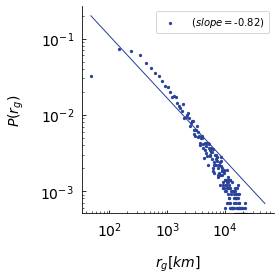

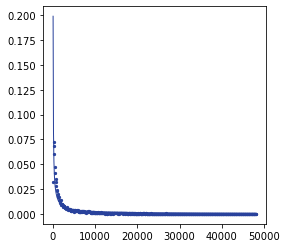

In [18]:
print('Cubiq Data====================')

path_figures='/Users/lucinezhong/Documents/LuZHONGResearch/20210328Scale_Mobility/Results_cuebiq/basic_statistics/'
print(path_figures)
color_list = ['#29429c', '#b2182b']
######jump-distance and arrival-time distribution
'''

arrival_time_distribution([df_within1,df_within2], ['before lockdown','after lockdown'],color_list,path_figures + 'delta_t(within).png')
jump_distance_distribution([df_within1,df_within2], ['before lockdown','after lockdown'],color_list,path_figures + 'delta_r(within).png')

arrival_time_distribution([df_cross1, df_cross2], ['before lockdown', 'after lockdown'],color_list,path_figures + 'delta_t(cross).png')
jump_distance_distribution([df_cross1, df_cross2], ['before lockdown', 'after lockdown'],color_list,path_figures + 'delta_r(cross).png')

arrival_time_distribution([df1,df2], ['before lockdown','after lockdown'], color_list,path_figures + 'delta_t(all).png')
jump_distance_distribution([df1,df2], ['before lockdown','after lockdown'], color_list, path_figures + 'delta_r(all).png')

'''
#####radius of gyration
df_rg1=gyration_caculate(df1,path_figures,'before_lockdown')
df_rg2=gyration_caculate(df2,path_figures,'after_lockdown')
radius_gyration_distribution([df_rg1], [''], color_list,path_figures + 'radius_gyration.png')
radius_gyration_distribution([df_rg1,df_rg2], ['before lockdown','after lockdown'], color_list, path_figures + 'radius_gyration(all).png')



In [29]:
print(df1[['dis_to_cluster']].head(10))

   dis_to_cluster
0        0.038120
1        0.045373
2        0.046362
3        0.042170
4        0.069588
5        0.031028
6        0.049889
7        0.046616
8        0.046459
9        0.044455


In [25]:
print(df1.head(5))

   Unnamed: 0  index      id            label   latitude  longitude  \
0           0      0  501634  8c44ca6715543ff  36.107477 -83.339436   
1           1      1  501634  8c44ca6715543ff  36.107477 -83.339436   
2           2      2  501634  8c44ca6715509ff  36.107611 -83.339329   
3           3      3  501634  8c44ca6715555ff  36.107631 -83.339523   
4           4      4  501634  8c44ca6715543ff  36.107477 -83.339436   

          start           end  stay_t(h)  travel_d(km)  month  home_lat  \
0  1.577830e+09  1.577832e+09   0.680556      0.010374      1    33.567   
1  1.577834e+09  1.577835e+09   0.323889      0.018371      1    33.567   
2  1.577837e+09  1.577838e+09   0.358056      0.006206      1    33.567   
3  1.577844e+09  1.577852e+09   2.221389      0.014335      1    33.567   
4  1.577854e+09  1.577856e+09   0.408611           NaN      1    33.567   

   home_lon      d_home  consecutive_dis         to_label    weight  cluster  \
0   -84.404  298.723153         0.000000  

Cubiq Data====================
figures for intracluster travel
/Users/lucinezhong/Documents/LuZHONGResearch/20210328Scale_Mobility/Results_cuebiq/MSD/


No handles with labels found to put in legend.


187643
0 2.3
455886
1 1.9
486942
10 1.9
283165
100 2.4


"\n#df_slope_within2=Exploartion_tendency_plot(df2,rgc_dict,path_figures,'(within_after)')  \n\n#df_slope_within1.to_csv(path_figures+'rgc_gamma_within_before.csv')\n#df_slope_within2.to_csv(path_figures+'rgc_gamma_within_after.csv')\n#print('done')\n"

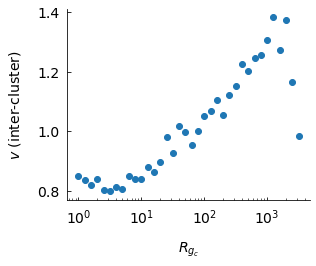

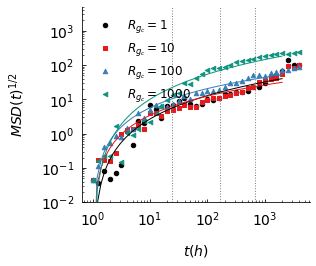

In [46]:
print('Cubiq Data====================')
print('figures for intracluster travel')
#within clusters: distance_to_center distribution
path_figures='/Users/lucinezhong/Documents/LuZHONGResearch/20210328Scale_Mobility/Results_cuebiq/MSD/'


print(path_figures)

#distance_to_center_distribution(df,df_home, path_figures)



#MSD_plot_distance_example(df1,df_home, df_Edc,path_figures,'(within_before)')


#within clusters: MSD plot 
#df_MSD_slope_within=MSD_plot(df1,df_home, rgc_dict,path_figures,'(within_before)')

new_df1=copy.deepcopy(df1)
new_df1['cluster']=[1]*len(new_df1)
id_list=pd.unique(new_df1['id'])
new_df1=new_df1[new_df1['id'].isin(id_list[0:2000])]
MSD_plot(new_df1,df_home, rgc_dict,path_figures,'(all)')


#MSD_plot(df2,df_home, rgc_dict,path_figures,'(within_after)')


#within clusters: Exploration-tendency

#df_slope_within1=Exploartion_tendency_plot(df1,rgc_dict,path_figures,'(within_before)')
'''
#df_slope_within2=Exploartion_tendency_plot(df2,rgc_dict,path_figures,'(within_after)')  

#df_slope_within1.to_csv(path_figures+'rgc_gamma_within_before.csv')
#df_slope_within2.to_csv(path_figures+'rgc_gamma_within_after.csv')
#print('done')
'''

/Users/lucinezhong/Documents/LuZHONGResearch/20210328Scale_Mobility/Results_cuebiq/MSD/


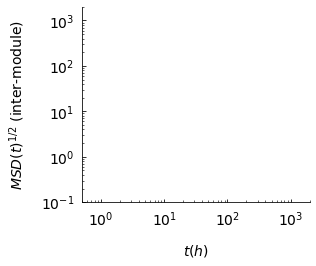

In [31]:
print(path_figures)
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.8))

set_fig_style(ax, r'$t(h)$',r'$MSD(t)^{1/2}$'+' (inter-module)',1)
#ax.legend(loc='upper left', fontsize=12, frameon=False)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.1, 2000)
ax.set_xlim(0.5, 2000)
plt.tight_layout()
fig.savefig(path_figures+'MSD_temp.png',dpi=600)

Cubiq Data====================
figures for inter-cluster travel
strange


No handles with labels found to put in legend.


455886
0 10 1.1
486942
10 100 1.0
384688
100 1000 2.0
108438
1000 10000 3.1


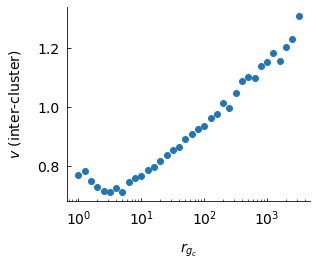

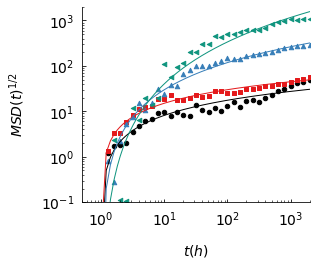

In [20]:
print('Cubiq Data====================')
print('figures for inter-cluster travel')
    
#cross clusters: MSD plot 
df_MSD_slope_cross=MSD_cross_plot(df1,df_home, rgc_dict,path_figures,'(cross)')

#cross clusters: Exploration-tendency

    

#df_slope_cross1=Exploartion_tendency_cross_plot(df1,rgc_dict,path_figures,'(cross_before)')
#df_slope_cross2=Exploartion_tendency_cross_plot(df2,rgc_dict,path_figures,'(cross_after)')   
#df_slope_cross1.to_csv(path_figures+'rgc_gamma_cross_before.csv')
#df_slope_cross2.to_csv(path_figures+'rgc_gamma_cross_after.csv')

Cubiq Data====================
MSD_Slope vs Rgc
2.6240064822459632
2.5580589602666945
1.0
within gramma slope 0.02042250050647869 0.6070904553224579
cross gramma slope 0.14151956673173605 0.6883797104509486
/Users/lucinezhong/Documents/LuZHONGResearch/20210328Scale_Mobility/Results_cuebiq/MSD/


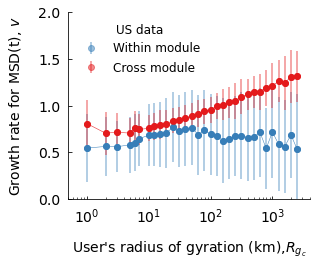

In [109]:
print('Cubiq Data====================')
print('MSD_Slope vs Rgc')
path_figures='/Users/lucinezhong/Documents/LuZHONGResearch/20210328Scale_Mobility/Results_cuebiq/MSD/'

templist = list([int(math.pow(10, i/5)) for i in np.arange(0, 20)])

print(df_MSD_slope_within['slope'].max())
print(df_MSD_slope_cross['slope'].max())

#print(df_MSD_slope_within)
#print(df_MSD_slope_cross)
print(df_MSD_slope_within['rgc'].min())
MSD_v_within_cross_plot(df_MSD_slope_within,df_MSD_slope_cross)
print(path_figures)

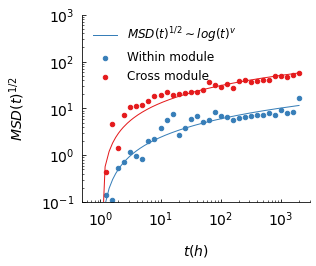

In [122]:
import matplotlib.text as mtext

class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
        handlebox.add_artist(title)
        return title
    
def select_usr_MSD_intra_inter_comparison(df_intra_MSD,df_inter_MSD):
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.8))
    
    
    
    color_list=['#000000','#fa8072','#9ab4d5','#8cd2c6','#edf7b5']
    color_list=['#377eb8','#e41a1c', '#0f947e']
    marker_list = [ 'o', '^','o', '<', '>', '*', '+']
    
    
    label_list=['Within module','Cross module']
    df_list=[df_intra_MSD,df_inter_MSD]
    for value1, value2, label_x,marker in zip([30,100,500],[50,150,1000],['User-1','User-2','User-3'],marker_list):  
        for color,label,df in zip(color_list,label_list,[df_intra_MSD,df_inter_MSD]):
            id_list = [key for key, value in rgc_dict.items() if value >= value1 and value <= value2]
            df_tempx = df[df['id'].isin(id_list)]
            
            df_tempx=df_tempx.groupby(['t'])['MSD'].mean().reset_index()
            df_tempx=df_tempx[df_tempx['t']<2000]
            df_tempy=df_tempx[(df_tempx['t']>10)|(df_tempx['t']<2)] #len(templist)
            #df_tempy =df_tempx[df_tempx['t']>=1]
            #df_tempy=df_tempx
            xline = np.log10(df_tempy['t'])
            yline = np.log10(df_tempy['MSD'])
            popt, pcov = curve_fit(fun_temp, xline[1:-1], yline[1:-1],maxfev = 100000)
            xline=np.arange(10000)/5
            yline=fun_temp(np.log10(xline), *popt)
            yline = np.power(10,yline)
            if label=='Within module':
                ax.plot(xline, yline,color=color,linewidth=1,label=r'${MSD}(t)^{1/2} \sim log(t)^v$')
            else:
                ax.plot(xline, yline,color=color,linewidth=1)
            ax.scatter(df_tempx['t'], df_tempx['MSD'], color=color,marker=marker,s=20,label=label)
                
        break
                
    #ax.plot(np.arange(1, 400000) / 10, np.arange(1, 400000) / 10, color='black')
    
    #ax.axvline(x=24, linewidth=1,color='grey',linestyle=":")
    #ax.axvline(x=24*7, linewidth=1, color='grey',linestyle=":")
    #ax.axvline(x=24 * 28, linewidth=1, color='grey',linestyle=":")


    set_fig_style(ax, r'$t(h)$',r'$MSD(t)^{1/2}$',1)
    legend=ax.legend(loc='upper left', fontsize=12,frameon=False)
    legend.get_title().set_fontsize('12')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(0.1, 1000)
    ax.set_xlim(0.5, 3000)
    plt.tight_layout()
    fig.savefig(path_figures+'MSD_usr_groups_specific.png',dpi=600)
 
path_figures='/Users/lucinezhong/Documents/LuZHONGResearch/20210328Scale_Mobility/Results_cuebiq/MSD/'
df_intra_MSD=pd.read_csv(path_figures+"df_MSD_intra_(within_before).csv")
df_inter_MSD=pd.read_csv(path_figures+"df_MSD_inter_(cross).csv")

select_usr_MSD_intra_inter_comparison(df_intra_MSD,df_inter_MSD)


In [71]:
###within,cross,gmma
print('Cubiq Data====================')
df_slope_cross1=pd.read_csv(path_figures+'rgc_gamma_cross_before.csv')
df_slope_within1=pd.read_csv(path_figures+'rgc_gamma_within_before.csv')

gmma_within_cross_plot(df_slope_within1,df_slope_cross1)

Cubiq Data====================


TypeError: gmma_within_cross_plot() missing 1 required positional argument: 'eq_str'

# Senegal Data

In [17]:

df,df_home,path_figures=raw_data_load('senegal')

df_within1,df_cross1=split_within_cross_data(df)

print(len(df),len(df_within1),len(df_cross1))

df_Edc,path_figures=cluster_data_load('senegal','temp')


df_temp=copy.deepcopy(df_Edc)
df_temp['r_g_inter'] = df_Edc['d_home']*df_temp['d_home']
df_temp['count'] =1
df_temp = df_temp.groupby(['id']).agg({'r_g_inter' : ['sum'], 'count' : ['sum']}).reset_index()
df_temp.columns=['id','r_g_inter','count']
df_temp['r_g_inter']=np.sqrt(df_temp['r_g_inter']/df_temp['count'])
df_temp.to_csv(path_figures+'radius_gyration(inter_cluster).csv')
rgc_dict = dict(zip(df_temp['id'], df_temp['r_g_inter']))
print('Senegal Data====================')
print('----------------load done----------------')

1015101 871755 143346
Senegal Data====================
----------------load done----------------


In [13]:
print(len(pd.unique(df_Edc['id'])))

28598


/Users/lucinezhong/Documents/LuZHONGResearch/20210328Scale_Mobility/Results_senegal/
basic statistics for data


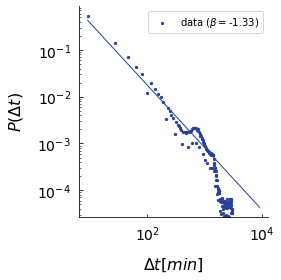

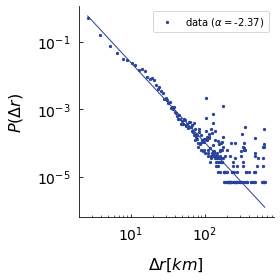

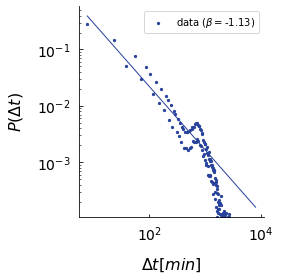

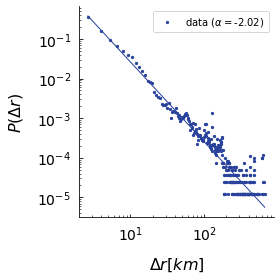

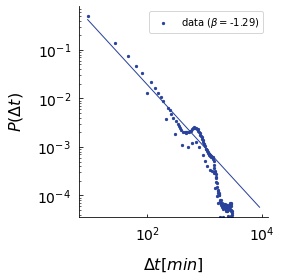

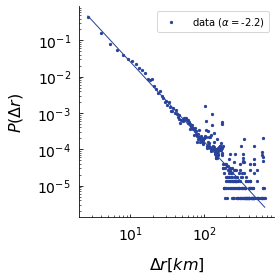

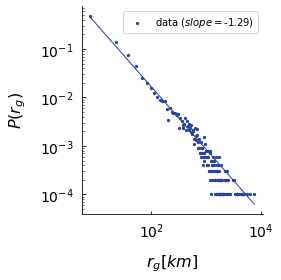

In [23]:
print('Senegal Data====================')
print(path_figures)
print('basic statistics for data')
color_list = ['#29429c', '#b2182b']
######jump-distance and arrival-time distribution


arrival_time_distribution([df_within1], ['data'],color_list,path_figures + 'delta_t(within).png')
jump_distance_distribution([df_within1], ['data'],color_list,path_figures + 'delta_r(within).png')

arrival_time_distribution([df_cross1], ['data'],color_list,path_figures + 'delta_t(cross).png')
jump_distance_distribution([df_cross1], ['data'],color_list,path_figures + 'delta_r(cross).png')

arrival_time_distribution([df], ['data'], color_list,path_figures + 'delta_t(all).png')
jump_distance_distribution([df], [' data'], color_list, path_figures + 'delta_r(all).png')


#####radius of gyration
df_rg=gyration_caculate(df,path_figures,'data')
radius_gyration_distribution([df_rg], ['data'], color_list,path_figures + 'radius_gyration.png')


Senegal Data====================
figures for intracluster travel
usr_group value1, value2 -0.7606871106796298
usr_group value1, value2 -0.7000457441162198
usr_group value1, value2 -0.7125288887747561
usr_group value1, value2 -0.7125288887747561
exponent -0.32319250213396394 -0.07564459026423839
117305
check_slope 0 -0.3004413157120726
check_slope 10 -0.3521206683027597
check_slope 100 -0.4401749832037502
gamma_distribution_slope -1.3595412840963714 -1.564412984203745


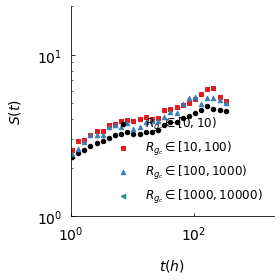

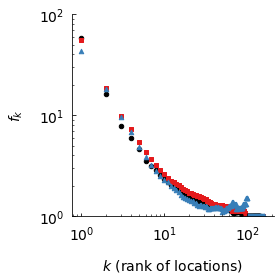

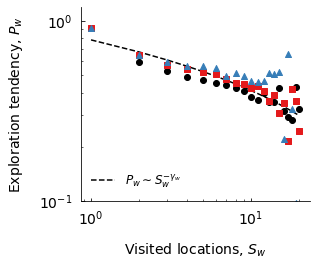

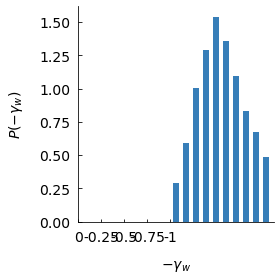

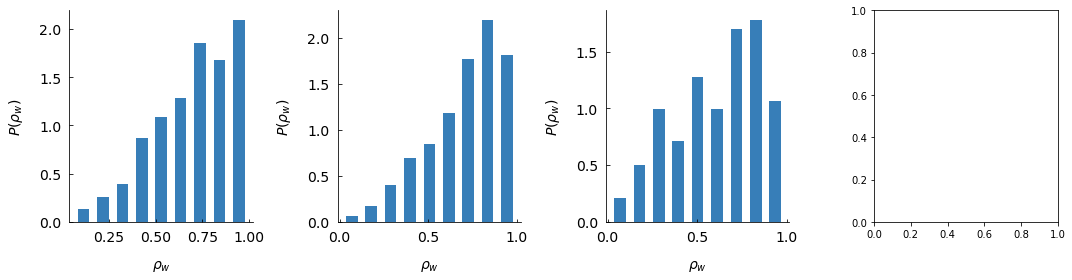

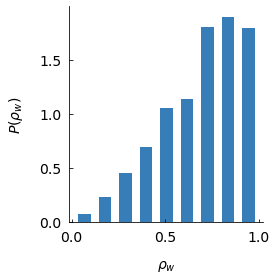

In [44]:
print('Senegal Data====================')
print('figures for intracluster travel')

path_figures='/Users/lucinezhong/Documents/LuZHONGResearch/20210328Scale_Mobility/Results_senegal/MSD/'
#within clusters: MSD plot 
#df_MSD_slope_within=MSD_plot(df,df_home, rgc_dict,path_figures,'(within)')

#within clusters: Exploration-tendency

df_slope_within1=Exploartion_tendency_plot(df,rgc_dict,path_figures,'(within)')

df_slope_within1.to_csv(path_figures+'rgc_gamma_within_before.csv')


In [28]:
print(df_MSD_slope_within)

            rgc     slope  rgc_new
0     12.589254  3.746885       10
1     79.432823  4.598397       63
2      1.000000  3.577161        1
3      7.943282  0.038559        6
4    100.000000  3.896868      100
..          ...       ...      ...
587   31.622777  4.034046       25
588   10.000000  5.635604       10
589    6.309573  4.074935        6
590    1.258925  3.680959        1
591    6.309573  3.561298        6

[592 rows x 3 columns]


Senegal Data====================
figures for inter-cluster travel
/Users/lucinezhong/Documents/LuZHONGResearch/20210328Scale_Mobility/Results_senegal/MSD/
usr_group value1, value2 -0.8432115204116077
712
5 10 -0.6504393622064202 0.12937385263046908
10 100 -0.44754783286768335 0.05907732891274533
100 1000 -0.12952420146961754 -0.039086319683136896
1000 10000 -0.12952420146961754 -0.039086319683136896
gamma_distribution_slope -0.35089259650048743 -1.1820072194419944
gamma_rgc -0.36501136897357533 1.2138566530486288
check_learned_gamma -0.6504393622064202
check_learned_gamma -0.44754783286768335
check_learned_gamma -0.12952420146961754


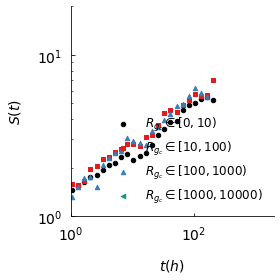

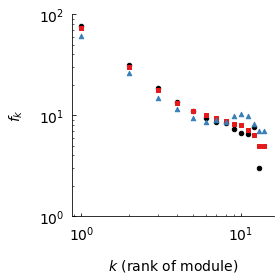

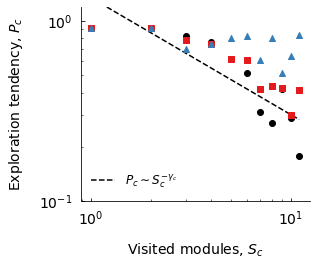

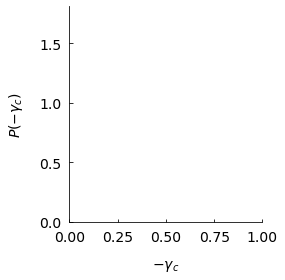

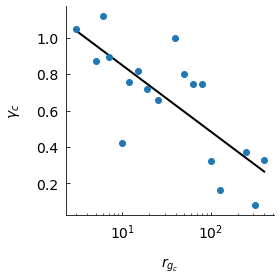

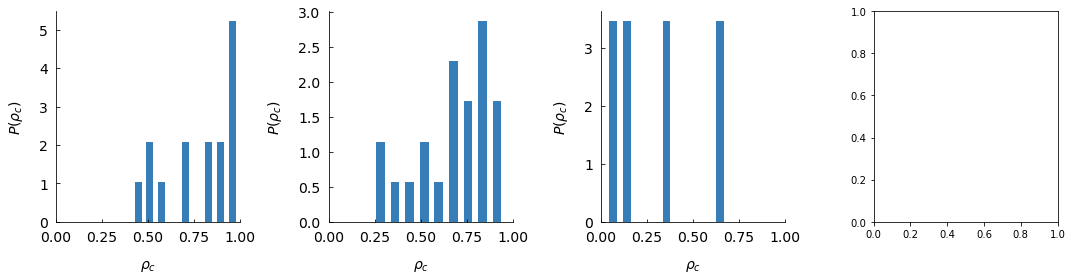

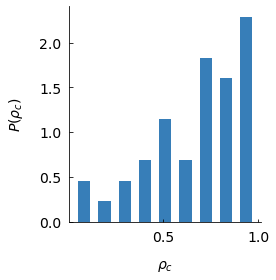

In [49]:
print('Senegal Data====================')
print('figures for inter-cluster travel')
print(path_figures)
#cross clusters: MSD plotd
#df_MSD_slope_cross=MSD_cross_plot(df,df_home, rgc_dict,path_figures,'(cross)')

#cross clusters: Exploration-tendency

    

df_slope_cross1=Exploartion_tendency_cross_plot(df,rgc_dict,path_figures,'(cross)')
df_slope_cross1.to_csv(path_figures+'rgc_gamma_cross_before.csv')

In [224]:
def MSD_v_within_cross_plot(df1,df2):
    base=10
    color_list=['#000000','#e41a1c', '#377eb8','#0f947e']

    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.8))
   
    df1=df1[(df1['rgc']<200)&(df1['slope']>=0)]
    df2=df2[(df2['rgc']<200)&(df2['slope']>=0)]
    
    df1['rgc_new'] = list(map(lambda i: math.pow(10, int(math.log10(i)/0.2)*0.2),  df1['rgc'] ))
       
    df2['rgc_new'] =list(map(lambda i: math.pow(10, int(math.log10(i)/0.2)*0.2),  df2['rgc'] ))
         
    df_temp_mean1=df1.groupby(['rgc_new'] )['slope'].mean().reset_index()
    df_temp_mean2=df2.groupby(['rgc_new'] )['slope'].mean().reset_index()
    df_temp_std1=df1.groupby(['rgc_new'] )['slope'].std().reset_index()
    df_temp_std2=df2.groupby(['rgc_new'] )['slope'].std().reset_index()
    
    ax.errorbar(df_temp_mean1['rgc_new'][0:-1], df_temp_mean1['slope'][0:-1], df_temp_std1['slope'][0:-1]/3,color='#377eb8', alpha=0.5, fmt='o',label='Within module')
    ax.errorbar(df_temp_mean2['rgc_new'][0:-1], df_temp_mean2['slope'][0:-1], df_temp_std2['slope'][0:-1]/3,color='#e41a1c',  alpha=0.5,fmt='o',label='Cross module')
    
    ax.plot(df_temp_mean1['rgc_new'][0:-1], df_temp_mean1['slope'][0:-1], marker='o',color='#377eb8',linewidth=0.5)
    ax.plot(df_temp_mean2['rgc_new'][0:-1], df_temp_mean2['slope'][0:-1],  marker='o',color='#e41a1c',linewidth=0.5)
 
    a, b, xline, yline = fitting_linear(np.log10(df1['rgc'][1:-1]+0.001), df1['slope'][1:-1], base)
    print('within gramma slope',a,b)
    yline=np.log10(df1['rgc'])*a+b
    y_v=np.mean(yline)
    #ax.plot(df1['rgc'][0:-2], yline[0:-2], color='#e41a1c', linewidth=2, zorder=1)
    
    a, b, xline, yline = fitting_linear(np.log10(df2['rgc'][2:-2]+0.001), df2['slope'][2:-2], base)
    print('cross gramma slope',a,b)
    yline=np.log10(df2['rgc'])*a+b
    #ax.plot(df2['rgc'][0:-2], yline[0:-2], color='#377eb8', linewidth=2, zorder=1)


    set_fig_style(ax, "User's radius of gyration (km),"+r'$R_{g_c}$','Growth rate for MSD(t),'+r'$~v$',1)
    legend=ax.legend(loc='upper left', fontsize=12, title='Senegal data',frameon=False)
    legend.get_title().set_fontsize('12')
    
    '''
    ax.set_xlim(0.5,5000)
    ax.set_xlim(0.5,1100)
    
    
    ax.set_xticks([1,10,100,1000])
    ax.set_xticklabels([1,10,100,1000])
    '''
    ax.set_ylim(0,2)
    ax.set_xlim(0.8,200)
    
    ax.set_xscale('log')
    #ax.set_ylim(0,5)
    import matplotlib.ticker
   
    #ax.set_ylim(0,1.0)
    fig.tight_layout()

    fig.savefig(path_figures + 'MSD_v_rg(compare).png', dpi=600)

In [208]:
print(len(df_MSD_slope_within))
print(len(df_MSD_slope_cross))

1328
2180


Senegal Data====================
MSD_Slope vs Rgc
[1, 1, 2, 3, 6, 10, 15, 25, 39, 63, 100, 158, 251, 398, 630, 1000, 1584, 2511, 3981, 6309]
within gramma slope 0.02886163016568033 0.7119898622640275
cross gramma slope 0.6754768686212711 0.27716947471523545


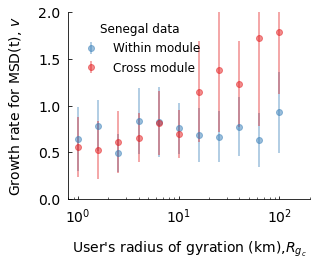

In [226]:
print('Senegal Data====================')
print('MSD_Slope vs Rgc')
templist = list([int(math.pow(10, i/5)) for i in np.arange(0, 20)])

print(templist)
#print(df_MSD_slope_within)
#print(df_MSD_slope_cross)

MSD_v_within_cross_plot(df_MSD_slope_within,df_MSD_slope_cross)

In [46]:
print(df_slope_within1)

         slope         rgc
0     1.150289    0.000000
1     0.389134    8.904007
2     0.537151    9.572693
3     0.254890    0.709238
4     0.456715    2.317981
...        ...         ...
2136  0.464780  268.862312
2137  0.941267  149.195691
2138  0.768133  206.902011
2139  0.301092  122.740614
2140  0.584986  253.947921

[2141 rows x 2 columns]


Senegal Data====================
figures for gamma_within_cross
   rgc     slope
0    0  0.718243
1    1  0.700527
2    2  0.646761
3    3  0.648350
4    6  0.581776
5   10  0.610274
6   15  0.546894
7   25  0.595303
8   39  0.610466
9   63  0.544058
within gramma slope -0.05959275188816326 0.669026538327082
middle,y_v 0.594535598466878 inf
cross gramma slope -0.30337431334733383 1.0637481153565793


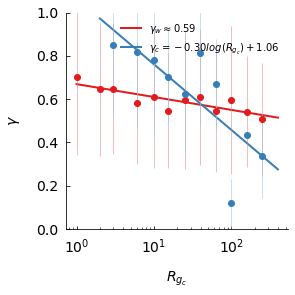

In [72]:
print('Senegal Data====================')
print('figures for gamma_within_cross')
###within,cross,gmma
df_slope_cross1=pd.read_csv(path_figures+'rgc_gamma_cross_before.csv')
df_slope_within1=pd.read_csv(path_figures+'rgc_gamma_within_before.csv')
sq_str=r'$\gamma_c=-0.30log(R_{g_c})+1.06$'
gmma_within_cross_plot(df_slope_within1,df_slope_cross1,sq_str)